In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# Reading in data

In [2]:
df = pd.read_feather('all/preprocessed_predictive')
df.set_index("ID", inplace = True)
pd.set_option("display.max_columns", None)

In [3]:
df.head()

,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Country Code,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Cancellation Policy,Calculated host listings count,Reviews per Month,Description Language,Description Polarity,review_polarity,Host Since_Day,Host Since_Month,Host Since_Year,First Review_Day,First Review_Month,First Review_Year,Last Review_Day,Last Review_Month,Last Review_Year,Amenities_Wireless Internet,Amenities_Kitchen,Amenities_Heating,Amenities_Essentials,Amenities_Washer,Amenities_TV,Amenities_Family/kid friendly,Amenities_Internet,Amenities_Hangers,Amenities_Hair dryer,Amenities_Shampoo,Amenities_Iron,Amenities_Laptop friendly workspace,Amenities_Elevator in building,Amenities_Smoke detector,Amenities_Buzzer/wireless intercom,Amenities_translation missing: en.hosting_amenity_50,Amenities_Air conditioning,Amenities_Cable TV,Amenities_First aid kit,Amenities_Dryer,Amenities_24-hour check-in,Amenities_Fire extinguisher,Amenities_translation missing: en.hosting_amenity_49,Amenities_Smoking allowed,Amenities_Pets allowed,Amenities_Free parking on premises,Amenities_Carbon monoxide detector,Amenities_Safety card,Amenities_Breakfast,Verifications_phone,Verifications_email,Verifications_reviews,Verifications_jumio,Verifications_facebook,Verifications_government_id,Verifications_work_email,Verifications_offline_government_id,Verifications_google,Verifications_manual_offline,Features_Host Has Profile Pic,Features_Is Location Exact,Features_Host Identity Verified,Features_Instant Bookable,Features_Requires License,Features_Host Is Superhost,Features_Require Guest Phone Verification
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9902936,0,100.0,9.0,291,0,48.215747,16.374918,0,0,4,1.0,2.0,2.0,4,69.0,150.0,59.0,2,12.0,2,1125,6,6,15,23,265,67,96.0,5,4,4.90,7,-0.700000,0.354359,2,12,2014,26,3,2016,29,4,2017,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0
16932319,1,90.0,3.0,291,0,48.225823,16.401469,0,0,2,1.0,1.0,1.0,4,69.0,150.0,45.0,2,19.0,3,28,28,12,37,67,321,5,96.0,5,1,2.27,9,0.173817,0.000000,8,11,2014,5,3,2017,30,4,2017,0,1,1,1,1,0,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0
4086303,1,100.0,1.0,291,0,48.214652,16.379914,0,0,3,1.0,1.0,1.0,4,100.0,164.0,65.0,3,20.0,2,1125,35,3,33,63,338,3,93.0,5,1,0.70,9,0.254762,0.363049,27,8,2010,2,1,2017,24,4,2017,1,1,1,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
13112862,0,100.0,3.0,291,0,48.222464,16.387926,0,0,2,1.0,1.0,1.0,4,75.0,0.0,40.0,1,0.0,2,185,0,5,9,32,302,50,100.0,5,3,5.07,7,0.000000,0.321735,14,2,2012,18,7,2016,5,5,2017,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,0
16945823,0,100.0,2.0,291,0,48.216764,16.384622,0,0,3,1.0,2.0,2.0,4,87.0,0.0,45.0,2,12.0,1,1125,7,19,49,79,348,2,100.0,2,1,2.00,7,0.106250,0.000000,2,9,2015,17,4,2017,29,4,2017,1,1,1,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209415 entries, 9902936 to 4938754
Data columns (total 90 columns):
Host Response Time                                      209415 non-null int8
Host Response Rate                                      209415 non-null float64
Host Listings Count                                     209415 non-null float64
Neighbourhood Cleansed                                  209415 non-null int16
Country Code                                            209415 non-null int8
Latitude                                                209415 non-null float64
Longitude                                               209415 non-null float64
Property Type                                           209415 non-null int8
Room Type                                               209415 non-null int8
Accommodates                                            209415 non-null int64
Bathrooms                                               209415 non-null float64
Bedrooms          

# Train-test split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop(columns = ["Price"])
y = df["Price"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
X_train

,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Country Code,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Cancellation Policy,Calculated host listings count,Reviews per Month,Description Language,Description Polarity,review_polarity,Host Since_Day,Host Since_Month,Host Since_Year,First Review_Day,First Review_Month,First Review_Year,Last Review_Day,Last Review_Month,Last Review_Year,Amenities_Wireless Internet,Amenities_Kitchen,Amenities_Heating,Amenities_Essentials,Amenities_Washer,Amenities_TV,Amenities_Family/kid friendly,Amenities_Internet,Amenities_Hangers,Amenities_Hair dryer,Amenities_Shampoo,Amenities_Iron,Amenities_Laptop friendly workspace,Amenities_Elevator in building,Amenities_Smoke detector,Amenities_Buzzer/wireless intercom,Amenities_translation missing: en.hosting_amenity_50,Amenities_Air conditioning,Amenities_Cable TV,Amenities_First aid kit,Amenities_Dryer,Amenities_24-hour check-in,Amenities_Fire extinguisher,Amenities_translation missing: en.hosting_amenity_49,Amenities_Smoking allowed,Amenities_Pets allowed,Amenities_Free parking on premises,Amenities_Carbon monoxide detector,Amenities_Safety card,Amenities_Breakfast,Verifications_phone,Verifications_email,Verifications_reviews,Verifications_jumio,Verifications_facebook,Verifications_government_id,Verifications_work_email,Verifications_offline_government_id,Verifications_google,Verifications_manual_offline,Features_Host Has Profile Pic,Features_Is Location Exact,Features_Host Identity Verified,Features_Instant Bookable,Features_Requires License,Features_Host Is Superhost,Features_Require Guest Phone Verification
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10379696,1,90.0,1.0,617,5,41.379763,2.165752,0,0,2,1.0,1.0,1.0,4,200.0,40.0,1,0.0,1,1125,28,20,50,80,355,8,68.0,5,1,0.59,9,0.165074,0.000000,19,7,2015,25,2,2016,16,10,2016,1,1,1,1,0,1,0,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3155271,0,100.0,1.0,158,9,52.357603,4.894366,0,0,4,1.0,2.0,2.0,4,0.0,40.0,1,0.0,2,60,0,0,0,6,11,56,97.0,2,1,1.64,9,0.249796,0.411157,5,3,2014,16,6,2014,19,2,2017,1,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0
6638070,0,95.0,12.0,141,2,46.200398,6.140181,0,0,2,1.0,1.0,1.0,4,0.0,0.0,1,0.0,1,1125,21,6,25,55,330,42,86.0,5,12,2.94,9,0.375000,0.000000,4,5,2015,8,6,2015,25,7,2016,1,1,1,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0
16716358,0,100.0,2.0,124,9,52.372715,4.880200,11,1,3,1.0,1.0,2.0,4,250.0,30.0,1,0.0,1,1125,7,2,11,19,215,7,91.0,2,2,3.33,9,0.217771,0.000000,24,6,2016,30,1,2017,12,3,2017,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,1,1,1,1,0,1,0,0,0,0,1,1,1,0,0,1,0
17324076,0,100.0,1.0,338,3,52.530981,13.348617,0,1,1,1.0,1.0,1.0,4,0.0,0.0,1,0.0,14,30,90,0,0,0,0,2,100.0,0,1,1.05,7,-0.875000,0.387293,18,2,2017,13,3,2017,1,4,2017,1,1,1,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968496,0,100.0,1.0,375,6,48.882302,2.345431,0,0,3,1.0,1.0,1.0,4,500.0,25.0,2,10.0,3,30,240,0,0,0,244,2,100.0,5,1,0.08,9,0.448951,0.000000,20,1,2012,20,3,2015,19,4,2015,1,1,1,1,1,1,1,1,0,0,0,1,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0
13587181,0,100.0,1.0,674,7,37.999692,23.742997,0,0,2,1.0,2.0,1.0,4,200.0,7.0,1,

In [9]:
y_train

ID
10379696     60.000000
3155271     250.000000
6638070      71.976513
16716358    200.000000
17324076     14.000000
               ...    
3968496      75.000000
13587181     22.000000
659821       75.000000
18092957    180.000000
12791554     50.000000
Name: Price, Length: 167532, dtype: float64

# Normalization and Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
ss = StandardScaler()

X_train_index = X_train.index.values.tolist()
X_train_columns = X_train.columns.values.tolist()

X_test_index = X_test.index.values.tolist()
X_test_columns = X_test.columns.values.tolist()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [12]:
X_train = pd.DataFrame(data = X_train, index = X_train_index, columns = X_train_columns)
X_test = pd.DataFrame(data = X_test, index = X_test_index, columns = X_test_columns)

# Training

In [13]:
import math

def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_test), y_test),
                m.score(X_train, y_train), m.score(X_test, y_test)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [14]:
m = xgb.XGBRegressor(subsample = 0.5)
%time m.fit(X_train, y_train, verbose = 2)
print_score(m)

CPU times: user 2min 9s, sys: 1.09 s, total: 2min 10s
Wall time: 19.7 s
[36.20689094731019, 44.17116320557985, 0.7623988759137373, 0.6595768391825308]


Its better than the previous attempt with Random Forest and with less overfitting.

# Feature Selection

In [15]:
feature_importance_df = pd.DataFrame(m.feature_importances_, index = X.columns, columns = ["Feature Importance"])
feature_importance_df

,Feature Importance
Host Response Time,0.002338
Host Response Rate,0.004820
Host Listings Count,0.010142
Neighbourhood Cleansed,0.007702
Country Code,0.045962
...,...
Features_Host Identity Verified,0.002857
Features_Instant Bookable,0.005951
Features_Requires License,0.000000
Features_Host Is Superhost,0.007072


In [16]:
# Top 30 most important features
feature_importance_df.sort_values(by=["Feature Importance"], ascending = False)[:30]

,Feature Importance
Bedrooms,0.111697
Room Type,0.067878
Country Code,0.045962
Amenities_Dryer,0.045345
Bathrooms,0.042664
Accommodates,0.040981
Amenities_TV,0.031462
Cleaning Fee,0.022232
Amenities_Air conditioning,0.020884
Amenities_Cable TV,0.019735


In [17]:
to_keep = feature_importance_df[feature_importance_df["Feature Importance"] > 0.01]
to_keep

,Feature Importance
Host Listings Count,0.010142
Country Code,0.045962
Latitude,0.013826
Longitude,0.014460
Room Type,0.067878
Accommodates,0.040981
Bathrooms,0.042664
Bedrooms,0.111697
Cleaning Fee,0.022232
Guests Included,0.013194


In [18]:
len(to_keep)

21

So, we can keep the top 24 most important features.

In [19]:
to_keep_list = list(to_keep.index)

In [20]:
X_important_features = X[to_keep_list].copy()
X_important_features

,Host Listings Count,Country Code,Latitude,Longitude,Room Type,Accommodates,Bathrooms,Bedrooms,Cleaning Fee,Guests Included,Extra People,Availability 30,Availability 365,Amenities_Wireless Internet,Amenities_Kitchen,Amenities_TV,Amenities_Air conditioning,Amenities_Cable TV,Amenities_Dryer,Amenities_Fire extinguisher,Verifications_government_id
ID,,,,,,,,,,,,,,,,,,,,,
9902936,9.0,0,48.215747,16.374918,0,4,1.0,2.0,59.0,2,12.0,6,265,1,1,1,0,1,0,1,0
16932319,3.0,0,48.225823,16.401469,0,2,1.0,1.0,45.0,2,19.0,12,321,0,1,0,0,0,0,0,0
4086303,1.0,0,48.214652,16.379914,0,3,1.0,1.0,65.0,3,20.0,3,338,1,1,1,0,0,0,0,0
13112862,3.0,0,48.222464,16.387926,0,2,1.0,1.0,40.0,1,0.0,5,302,1,1,1,0,1,0,1,0
16945823,2.0,0,48.216764,16.384622,0,3,1.0,2.0,45.0,2,12.0,19,348,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5485922,3.0,2,46.193129,6.195190,1,2,1.0,1.0,25.0,2,20.0,30,365,1,1,1,0,0,1,0,0
13055184,2.0,2,46.244876,6.203777,1,2,1.0,1.0,25.0,1,0.0,0,0,1,0,0,0,0,1,0,0
4944793,2.0,2,46.234977,6.083853,2,1,1.5,1.0,15.0,1,10.0,0,0,1,1,1,0,1,0,0,0


We can do the train-test splitting again.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_important_features, y, test_size = 0.2)

In [22]:
ss = StandardScaler()

X_train_index = X_train.index.values.tolist()
X_train_columns = X_train.columns.values.tolist()

X_test_index = X_test.index.values.tolist()
X_test_columns = X_test.columns.values.tolist()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [23]:
X_train = pd.DataFrame(data = X_train, index = X_train_index, columns = X_train_columns)
X_test = pd.DataFrame(data = X_test, index = X_test_index, columns = X_test_columns)

We train on much less features this time.

In [24]:
m = xgb.XGBRegressor(subsample = 0.5)
%time m.fit(X_train, y_train, verbose = 2)
print_score(m)

CPU times: user 51.5 s, sys: 286 ms, total: 51.8 s
Wall time: 8.45 s
[38.600576052329416, 44.192334407986024, 0.7345952748485199, 0.6345764263312429]


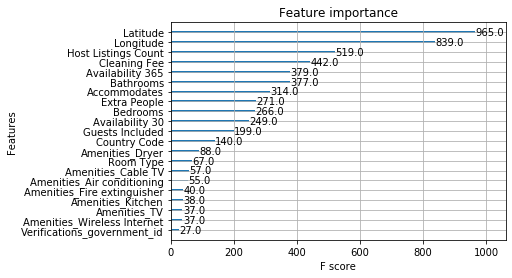

In [25]:
xgb.plot_importance(m)

# Investigating Redundant Features

We can look at what features are closely related to each other and see if we can remove anything.

In [26]:
import scipy
from scipy.cluster import hierarchy as hc

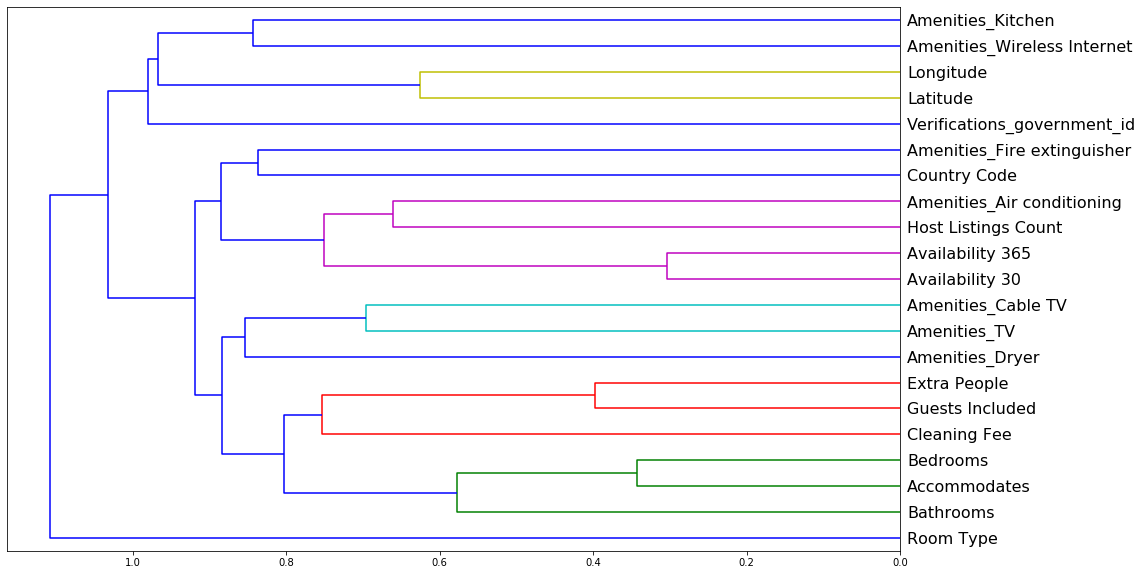

In [27]:
corr = np.round(scipy.stats.spearmanr(X_important_features).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X_important_features.columns, orientation='left', leaf_font_size=16)
plt.show()

Ok, it seems that there really isn't any highly similar features so we don't have to remove anything.

# K-Fold Cross Validation

We use 3-fold cross validation for XGBoosting. We can use the Grid Search method for this.

In [28]:
# from sklearn.model_selection import GridSearchCV

We just use 2 values for each hyperparameter because it takes too long to perform a grid search on more values. (I don't have a good CPU...)

In [29]:
# m = xgb.XGBRegressor(subsample = 0.5)

# param_grid = {"n_estimators" :        [100, 300],
#               "learning_rate" :       [0.01, 0.1],
#               "max_depth" :           [3, 5],
#               "colsample_bytree" :    [0.5, 1],
#               "gamma" :               [0, 0.2]}

In [30]:
# grid_search = GridSearchCV(m, param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [31]:
# %time grid_search.fit(X_train, y_train)

This takes really really long! But at least we can find the better hyperparameters for our XGBoosting model.

In [32]:
# grid_search.best_params_

In [33]:
m = xgb.XGBRegressor(subsample = 0.5, colsample_bytree = 1, gamma = 0, learning_rate = 0.1, max_depth = 5, n_estimators = 300)
%time m.fit(X_train, y_train, verbose = 2)
print_score(m)

CPU times: user 1min 51s, sys: 419 ms, total: 1min 51s
Wall time: 16.9 s
[40.31680607980485, 43.506204409149795, 0.7104701680086954, 0.6458354683338343]


# Predicting Prices

In [34]:
m.predict(X_test)

array([49.79279 , 31.282776, 85.91221 , ..., 25.290276, 70.83477 ,
       29.504986], dtype=float32)

In [35]:
pd.DataFrame({"predicted" : m.predict(X_test),
              "actual" : list(y_test)}, index = y_test.index.values.tolist())

,predicted,actual
6402488,49.792789,55.000000
3743965,31.282776,29.000000
6949579,85.912209,55.000000
13166287,41.618397,51.000000
14311795,66.014870,40.000000
...,...,...
17747616,86.378891,70.000000
17649886,92.010895,107.696031
938596,25.290276,25.000000
3711077,70.834770,53.377434


So, with this, we can see if an Airbnb unit is underpriced or overpriced.

In [36]:
y_train

ID
17913851    124.0
16132749    100.0
8864438      45.0
4067549     190.0
5961899     170.0
            ...  
9994887      26.0
16933994     50.0
18468435     75.0
11881483     54.0
11645961     30.0
Name: Price, Length: 167532, dtype: float64

In [37]:
X_all = pd.concat([X_train, X_test])
y_all = pd.concat([y_train, y_test])

In [38]:
prices_df = pd.DataFrame({"Predicted" : m.predict(X_all),
                          "Actual" : list(y_all)}, index = y_all.index.values.tolist())
prices_df

,Predicted,Actual
17913851,142.549637,124.000000
16132749,140.888275,100.000000
8864438,62.091728,45.000000
4067549,174.839828,190.000000
5961899,118.590591,170.000000
...,...,...
17747616,86.378891,70.000000
17649886,92.010895,107.696031
938596,25.290276,25.000000
3711077,70.834770,53.377434


In [39]:
prices_df["Price Ratio"] = prices_df["Actual"] / prices_df["Predicted"]
prices_df

,Predicted,Actual,Price Ratio
17913851,142.549637,124.000000,0.869872
16132749,140.888275,100.000000,0.709782
8864438,62.091728,45.000000,0.724734
4067549,174.839828,190.000000,1.086709
5961899,118.590591,170.000000,1.433503
...,...,...,...
17747616,86.378891,70.000000,0.810383
17649886,92.010895,107.696031,1.170470
938596,25.290276,25.000000,0.988522
3711077,70.834770,53.377434,0.753548


In [50]:
prices_df.sort_values(by = ["Predicted"])

,Predicted,Actual,Price Ratio
18439289,-90.291901,90.0,-0.996767
17485266,-47.101868,30.0,-0.636917
15562054,-38.951611,17.0,-0.436439
1158951,-37.267475,30.0,-0.804991
17638370,-27.701881,15.0,-0.541479
...,...,...,...
8258745,924.305176,998.0,1.079730
13795500,937.834290,900.0,0.959658
10515534,946.444275,129.0,0.136300
16327996,957.474976,969.0,1.012037


In [56]:
prices_df[prices_df["Price Ratio"] > 0.2].sort_values(by = ["Price Ratio"])

,Predicted,Actual,Price Ratio
18004737,114.745865,23.000000,0.200443
12371626,174.243759,35.000000,0.200868
29606,74.394577,15.000000,0.201628
3243638,99.093834,20.000000,0.201829
13119175,66.437233,13.445197,0.202374
...,...,...,...
15537678,0.076245,15.000000,196.734494
4169237,0.121436,35.000000,288.218157
18581343,0.251737,80.000000,317.792397
5304527,0.094065,30.000000,318.927354


There are clearly some faulty predictions where the predicted prices are negative.

### Predicting Individual Price

In [43]:
prices_df.loc[9902936]

Predicted      89.956100
Actual         69.000000
Price Ratio     0.767041
Name: 9902936, dtype: float64

Assuming that the model is correct, this means that this unit is underpriced and represents a good bargain!